1. IMPORTAMOS LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. RECOPILACIÓN DE DATOS

In [2]:
# Importamos los datos de un archivo csv a un DataFrame
df = pd.read_csv("/content/netflix1.csv")
# Mostramos los primeros cinco valores del DataFrame
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


3. EVALUAREMOS LOS DATOS.

In [3]:
# Comprobamos el estado de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
# Comprobamos si hay datos duplicados
df.duplicated().value_counts()

False    8790
dtype: int64

In [6]:
df.groupby('duration').count().sort_values(by='show_id',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
duration,,,,,,,,,
1 Season,1791,1791,1791,1791,1791,1791,1791,1791,1791
2 Seasons,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1


4. RESOLVEMOS LOS PROBLEMAS QUE TIENE EL DATASET Y LIMPIAMOS.

In [7]:
# Antes de limpiar, hagamos una copia del marco de datos.
df_clean = df.copy()

In [8]:
# La variable 'date_added' se ha categorizado como un objeto (cadena), 
# el tipo de datos más apropiado para esta variable sería datetime.
df_clean.date_added = pd.to_datetime(df_clean.date_added)

In [9]:
# Revisamos que se haya hecho correctamente.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [10]:
# La variable 'listed_in' puede tener varias categorías por medio.
# Asumiremos que la primera categoría sería la categoría 'principal' de la película.
df_clean['listed_in1'] = 0
df_clean['listed_in2'] = 0
df_clean['listed_in3'] = 0
temp_cat = df_clean.listed_in.str.split(',')
i=0
for i in range (8790):
    t_cat = temp_cat[i]
    if len(t_cat) == 1:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = 0
        df_clean['listed_in3'][i] = 0
    if len(t_cat) == 2:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = 0
    if len(t_cat) == 3:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = temp_cat[i][2]

<ipython-input-10-4253353061cd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in1'][i] = temp_cat[i][0]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-10-4253353061cd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in2'][i] = 0
<ipython-input-10-4253353061cd>:13: Se

In [11]:
df_clean

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,TV Dramas,0
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,0,0
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,Kids' TV,0,0


In [12]:
# Hay dos tipos diferentes de observaciones en un solo conjunto de datos: programas de televisión y películas. 
# La solución sería dividir el conjunto de datos en dos.
df_tv = df_clean[df_clean.type == 'TV Show']
df_movie = df_clean[df_clean.type == 'Movie']

In [13]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries


In [14]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals


In [15]:
# Cambiaremos la variable duracion por numeros enteros.
temp_dur = df_tv.duration.str.split(' ',expand=True)
df_tv['duration_seasons'] = temp_dur[0]
df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons)

<ipython-input-15-dc9c1533f3b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration_seasons'] = temp_dur[0]
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
temp_dur = df_movie.duration.str.split(' ',expand=True)
df_movie['duration_minutes'] = temp_dur[0]
df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes)

<ipython-input-16-26f964bc9db7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_minutes'] = temp_dur[0]


In [17]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_seasons
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries,1
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0,9
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0,1
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries,1


In [18]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0,90
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies,125
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0,104
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals,87


5. GUARDAREMOS LOS CSV CREADOS ANTERIORMENTE.

In [19]:
df_clean.to_csv('Netflix_DF.csv')
df_tv.to_csv('Netflix_TV.csv')
df_movie.to_csv('Netflix_Movie.csv')

6. PREGUNTAS A RESOLVER.

*   ¿Qué tipo de medios ha producido más Netflix?
*   ¿Qué país produjo la mayor parte de los medios de Netflix?
*   ¿Cuáles son los géneros más populares para los países que produjeron medios?
*   ¿Cuál es la relación entre el año en que se creó un medio y cuando se agregó a la plataforma de Netflix?
*   ¿Ha cambiado la clasificación de medios de Netflix con el tiempo?
*   ¿Cuáles son los géneros más populares para los medios de Netflix?
*   ¿Ha cambiado la duración de las temporadas de televisión o de la película con el tiempo?

Text(0, 0.5, 'Número de películas/programas de televisión')

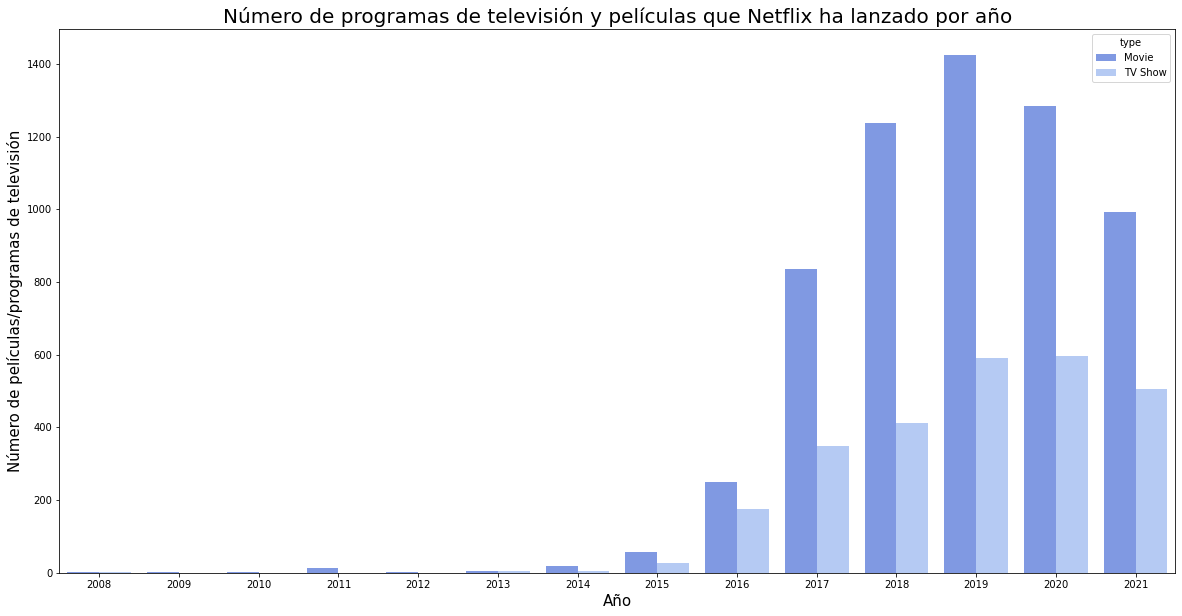

In [20]:
# Teniendo en cuenta que hay demasiados países, 
# limitaremos nuestro estudio a solo los 10 países principales.
plt.figure(figsize=[20,10])
base_color = sns.color_palette('coolwarm',n_colors=5)
tv_movie = sns.countplot(x=df_clean.date_added.dt.year, data=df_clean, hue='type', palette = base_color)
tv_movie.set_title("Número de programas de televisión y películas que Netflix ha lanzado por año",fontsize = 20)
tv_movie.set_xlabel('Año',fontsize = 15)
tv_movie.set_ylabel('Número de películas/programas de televisión',fontsize = 15)

Parece que tanto para los programas de televisión como para las películas ha habido un aumento constante desde principios de 2008; la única gran caída que ocurre en 2021 posiblemente se deba al impacto económico de COVID.

Antes de 2017, la cantidad de programas de televisión y películas que se traían al servicio de transmisión estaba a la par. Sin embargo, después de 2017, la compañía comenzó a introducir más películas en el servicio y duplicó la cantidad de contenido de los programas de televisión.

In [21]:
df_clean.date_added.dt.year.count()

8790

In [22]:
#Veamos cuántos países han producido un programa de televisión para Netlix
len(df_tv.groupby('country').count().index)

59

Text(0, 0.5, 'Número de programas de televisión')

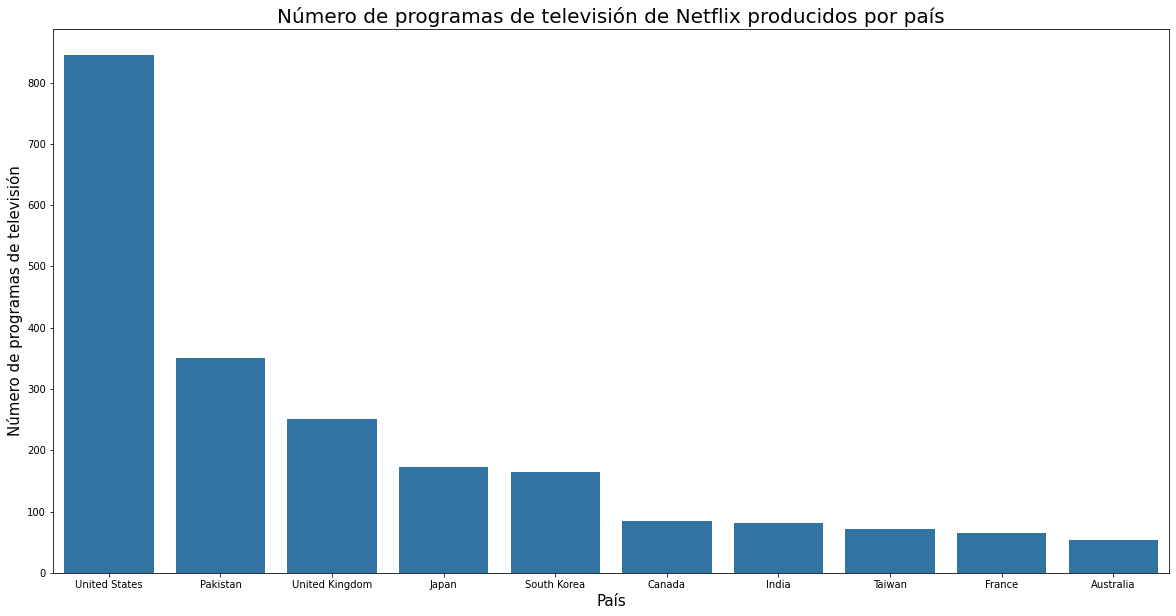

In [23]:
# Teniendo en cuenta que hay demasiados países, limitaremos nuestro estudio a solo los 10 países principales.
sort_order = df_tv.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_c = df_tv[df_tv['country'].isin(sort_order)]
base_color = base_color = sns.color_palette()[0]
plt.figure(figsize=[20,10])
tv_c = sns.countplot(x='country',data=df_tv_c,order=sort_order, color = base_color)
tv_c.set_title("Número de programas de televisión de Netflix producidos por país",fontsize = 20)
tv_c.set_xlabel('País',fontsize = 15)
tv_c.set_ylabel('Número de programas de televisión',fontsize = 15)

No es de extrañar que la mayoría de los programas de televisión que se traen al servicio de transmisión se hayan producido en los EE. UU. Sin embargo, el país con la segunda mayor producción sería Pakistán, que normalmente esperaría que el segundo lugar perteneciera a otro país de habla inglesa u occidental.

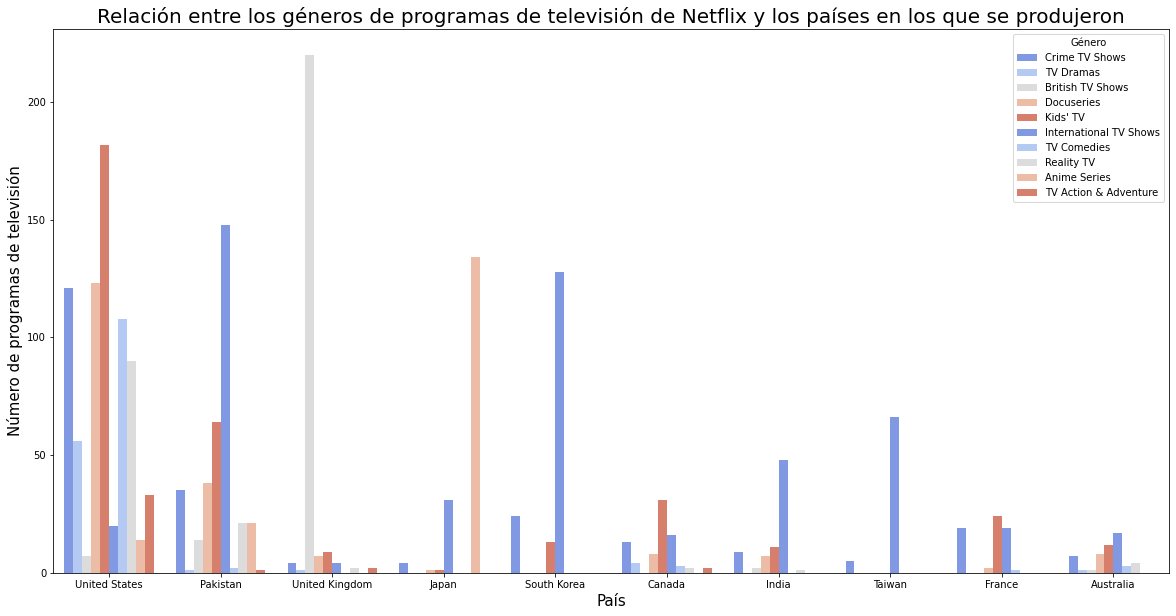

In [24]:
plt.figure(figsize=[20,10])
order1 = df_tv.groupby('listed_in1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_f = df_tv[df_tv['listed_in1'].isin(order1)]
order2 = df_tv_f.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_f = df_tv_f[df_tv_f['country'].isin(order2)]
base_color = sns.color_palette('coolwarm',n_colors=5)
a=df_tv.date_added.dt.year
tv_g = sns.countplot(data=df_tv_f,x='country',hue='listed_in1', palette=base_color, order=order2)
tv_g.set_xlabel('País',fontsize = 15)
tv_g.set_ylabel('Número de programas de televisión',fontsize = 15)
tv_g.set_title("Relación entre los géneros de programas de televisión de Netflix y los países en los que se produjeron",fontsize = 20)
plt.legend(title = 'Género', loc = 'upper right')

Los géneros de televisión más populares en general parecen ser la televisión para niños y los programas de televisión internacionales. Teniendo en cuenta que Netflix es una empresa estadounidense, tiene sentido que los programas producidos fuera de los EE. UU. se consideren "Programas de televisión internacionales".

EE. UU. Tiene una gran diversidad de programas producidos, pero la mayoría de ellos fueron TV Action & Adventure, seguidos de Docuseries y Crime TV Shows.

Para Pakistán y Corea del Sur, los dos géneros más producidos fueron Kid's TV y International TV Shows.

Sin embargo, el Reino Unido y Japón tienen la mayor producción de programas de telerrealidad y series de anime, respectivamente.

<ipython-input-25-602bcfe57b8f>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tv_f = df_tv[ry_f][da_f]


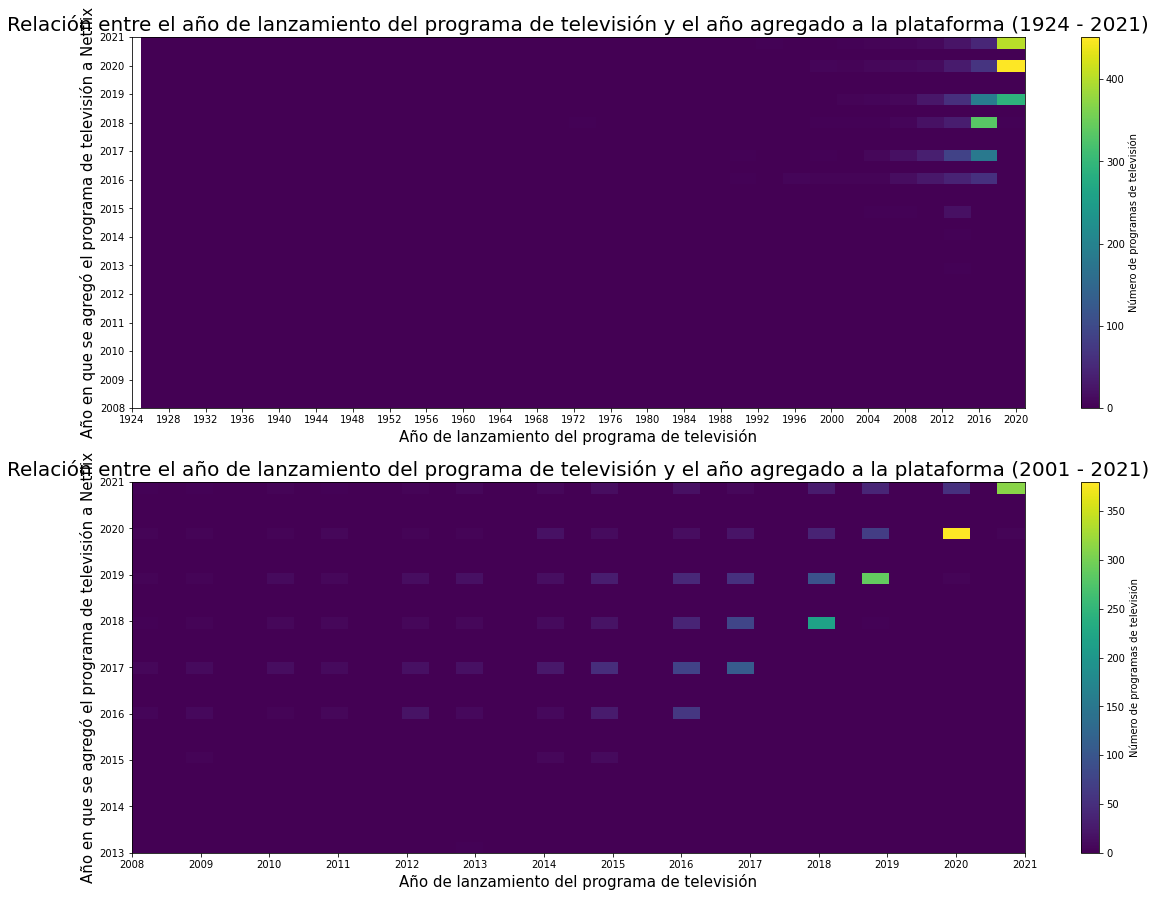

In [25]:
#Vemos la relación entre Netflix añadiendo programa de TV a su catálogo y su respectiva fecha de estreno
plt.figure(figsize=[20,15])
bins=np.arange(1924,2025,4)
plt.subplot(2,1,1)
tv_rd = plt.hist2d(data=df_tv,x='release_year',y=df_tv.date_added.dt.year, bins=33)
plt.xticks(np.arange(1924,2022,4));
plt.yticks(np.arange(2008,2022,1));
plt.xlabel('Año de lanzamiento del programa de televisión',fontsize = 15)
plt.ylabel('Año en que se agregó el programa de televisión a Netflix',fontsize = 15)
plt.title("Relación entre el año de lanzamiento del programa de televisión y el año agregado a la plataforma (1924 - 2021)",fontsize = 20)
plt.colorbar(label = 'Número de programas de televisión')

plt.subplot(2,1,2)
ry_f = df_tv.release_year>2007
da_f = df_tv.date_added.dt.year>2008
df_tv_f = df_tv[ry_f][da_f]
tv_rd1 = plt.hist2d(data=df_tv_f,x='release_year',y=df_tv_f.date_added.dt.year, bins=33)
plt.xticks(np.arange(2008,2022,1));
plt.yticks(np.arange(2013,2022,1));
plt.xlabel('Año de lanzamiento del programa de televisión',fontsize = 15)
plt.ylabel('Año en que se agregó el programa de televisión a Netflix',fontsize = 15)
plt.title("Relación entre el año de lanzamiento del programa de televisión y el año agregado a la plataforma (2001 - 2021)",fontsize = 20)
plt.colorbar(label = 'Número de programas de televisión')

Inicialmente, Netflix no incluiría programas de televisión producidos recientemente en el servicio. Fue hasta 2016, cuando el servicio comenzó a producir sus propios programas de televisión y a traer programas de televisión filmados recientemente a su servicio de transmisión.

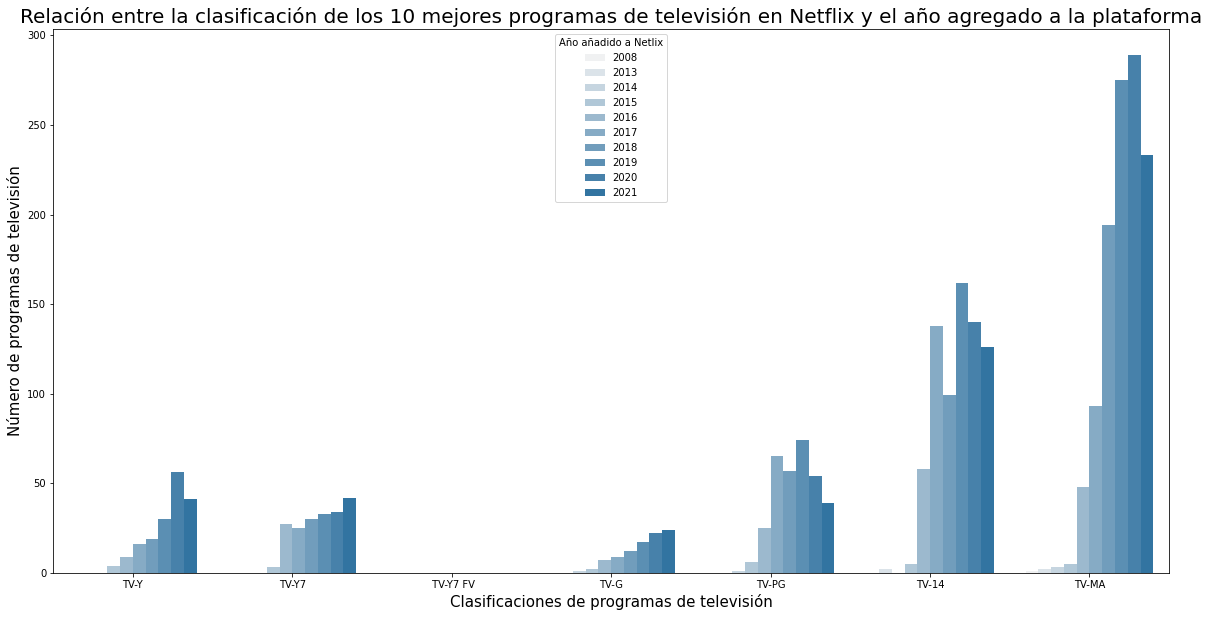

In [26]:
plt.figure(figsize=[20,10])
order = ['TV-Y', 'TV-Y7', ' TV-Y7 FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA']
base_color = base_color = sns.color_palette()[0]
a=df_tv.date_added.dt.year
tv_g = sns.countplot(data=df_tv,x='rating',hue=a, order=order, color=base_color)
tv_g.set_xlabel('Clasificaciones de programas de televisión',fontsize = 15)
tv_g.set_ylabel('Número de programas de televisión',fontsize = 15)
tv_g.set_title("Relación entre la clasificación de los 10 mejores programas de televisión en Netflix y el año agregado a la plataforma",fontsize = 20)
plt.legend(title = 'Año añadido a Netlix',)

La mayoría de los programas de televisión de Netflix se clasifican como TV-MA (principalmente) y TV-14 (secundariamente). TV-MA había ido aumentando constantemente hasta 2021; mientras que TV-14, por otro lado, ha tenido un crecimiento esporádico con una disminución a partir de 2020, esto es posible debido a que los programas de televisión empujan su clasificación a una audiencia más madura (TV-MA).

Los únicos programas que tuvieron un aumento constante sin caída alguna fueron los clasificados como TV-G y TV-Y7.

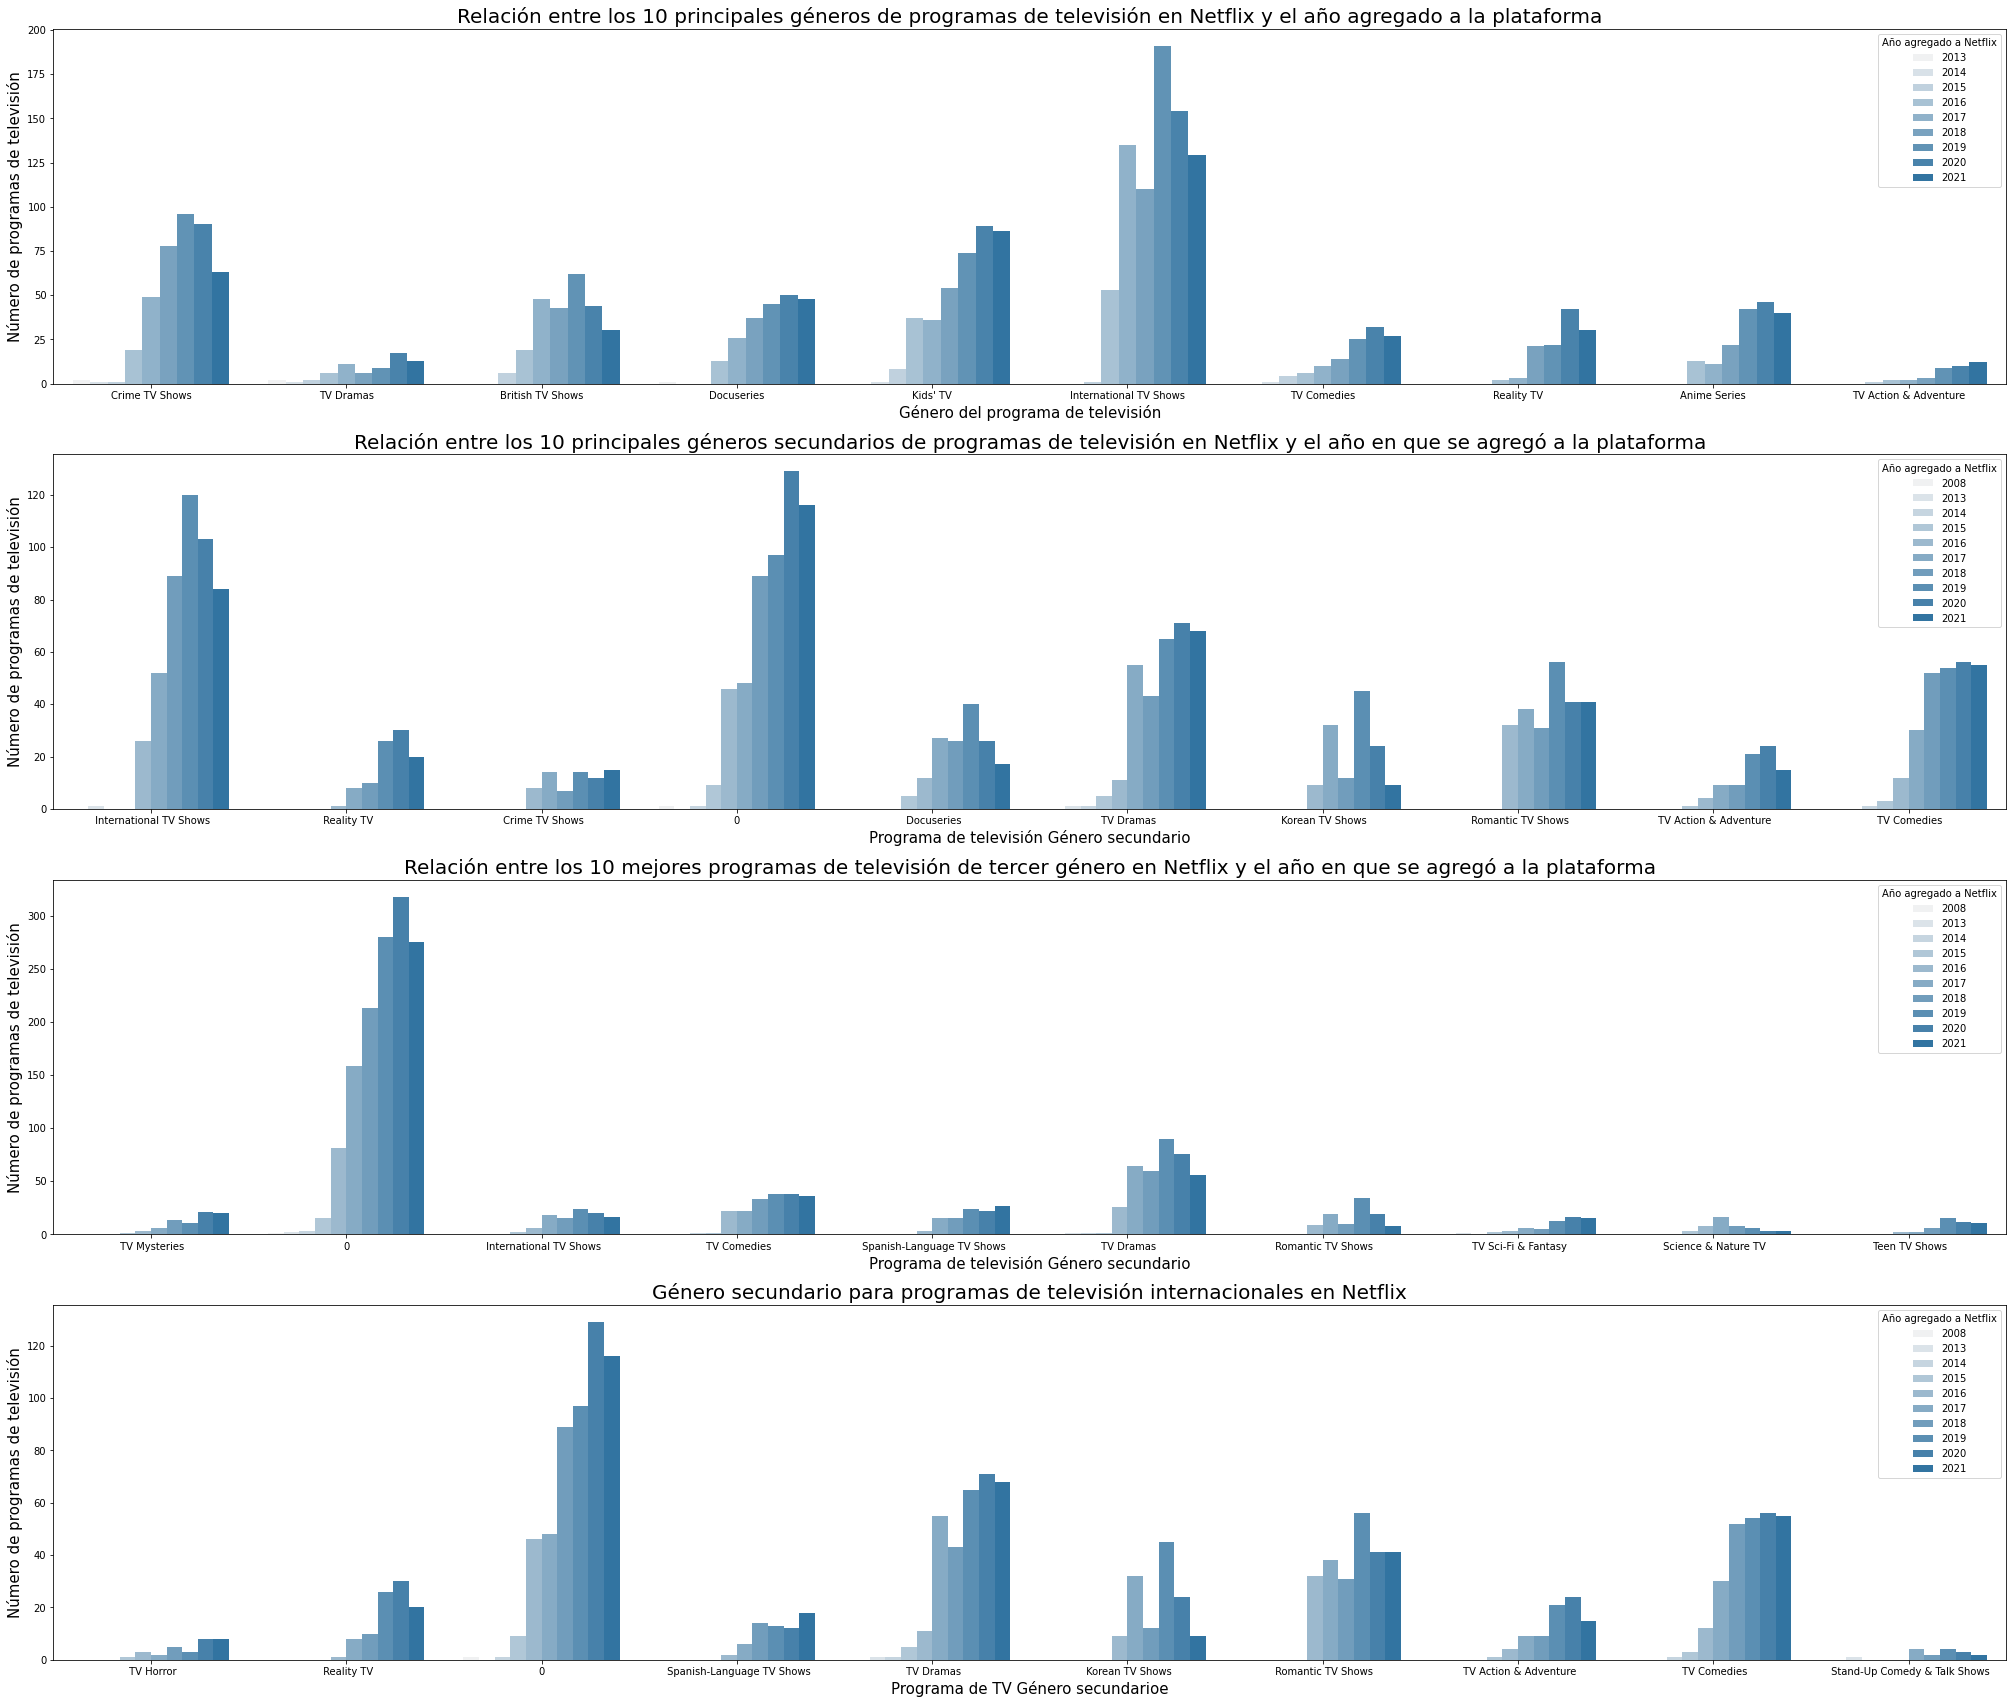

In [27]:
plt.figure(figsize=[35,30])
plt.subplot(4,1,1)

base_color = base_color = sns.color_palette()[0]
sort_order = df_tv.groupby('listed_in1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g = df_tv[df_tv['listed_in1'].isin(sort_order)]
tv_g = sns.countplot(data=df_tv_g,x='listed_in1',hue=df_tv_g.date_added.dt.year, color=base_color)
tv_g.set_xlabel('Género del programa de televisión',fontsize = 15)
tv_g.set_ylabel('Número de programas de televisión',fontsize = 15)
tv_g.set_title("Relación entre los 10 principales géneros de programas de televisión en Netflix y el año agregado a la plataforma",fontsize = 20)
plt.legend(title = 'Año agregado a Netflix')


plt.subplot(4,1,2)

base_color = base_color = sns.color_palette()[0]
sort_order = df_tv.groupby('listed_in2').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g = df_tv[df_tv['listed_in2'].isin(sort_order)]
tv_g1 = sns.countplot(data=df_tv_g,x='listed_in2',hue=df_tv_g.date_added.dt.year, color=base_color)
tv_g1.set_xlabel('Programa de televisión Género secundario',fontsize = 15)
tv_g1.set_ylabel('Número de programas de televisión',fontsize = 15)
tv_g1.set_title("Relación entre los 10 principales géneros secundarios de programas de televisión en Netflix y el año en que se agregó a la plataforma",fontsize = 20)
plt.legend(title = 'Año agregado a Netflix')

plt.subplot(4,1,3)

base_color = base_color = sns.color_palette()[0]
sort_order = df_tv.groupby('listed_in3').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g = df_tv[df_tv['listed_in3'].isin(sort_order)]
tv_g3 = sns.countplot(data=df_tv_g,x='listed_in3',hue=df_tv_g.date_added.dt.year, color=base_color)
tv_g3.set_xlabel('Programa de televisión Género secundario',fontsize = 15)
tv_g3.set_ylabel('Número de programas de televisión',fontsize = 15)
tv_g3.set_title("Relación entre los 10 mejores programas de televisión de tercer género en Netflix y el año en que se agregó a la plataforma",fontsize = 20)
plt.legend(title = 'Año agregado a Netflix', loc='upper right')

plt.subplot(4,1,4)
df_tv_g1 = df_tv.listed_in1=='International TV Shows'
df_tv_g1 = df_tv[df_tv_g1]
base_color = base_color = sns.color_palette()[0]
sort_order = df_tv_g1.groupby('listed_in2').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g1 = df_tv[df_tv['listed_in2'].isin(sort_order)]
tv_g4 = sns.countplot(data=df_tv_g1,x='listed_in2',hue=df_tv_g1.date_added.dt.year, color=base_color)
tv_g4.set_xlabel('Programa de TV Género secundarioe',fontsize = 15)
tv_g4.set_ylabel('Número de programas de televisión',fontsize = 15)
tv_g4.set_title("Género secundario para programas de televisión internacionales en Netflix",fontsize = 20)
plt.legend(title = 'Año agregado a Netflix', loc='upper right')

Para este análisis se tuvo que hacer una suposición, la primera categoría que aparece en un programa de televisión se clasificaría como la categoría 'principal', seguida por la secundaria y la tercera.

La mayoría de los programas de televisión producidos fueron programas de televisión internacionales, seguidos de programas sobre crímenes y TV para niños.

Para los géneros secundarios, la mayoría de los programas de televisión no tienen un género secundario. Pero el resto se clasificó principalmente como programas de televisión internacionales, dramas de televisión y comedias de televisión.

Para los terceros géneros, la mayoría de los programas de televisión no tienen un tercer género. Pero el resto se clasificaron principalmente como dramas de televisión, comedias de televisión y programas de televisión románticos.

Dado que los programas de televisión internacionales son un género amplio, también realizamos un análisis de los géneros secundarios para los programas de televisión internacionales. El resultado fue que la mayoría de ellos no tienen un género secundario. Pero el resto se clasificaron principalmente como dramas de televisión, programas de televisión románticos y comedias de televisión.

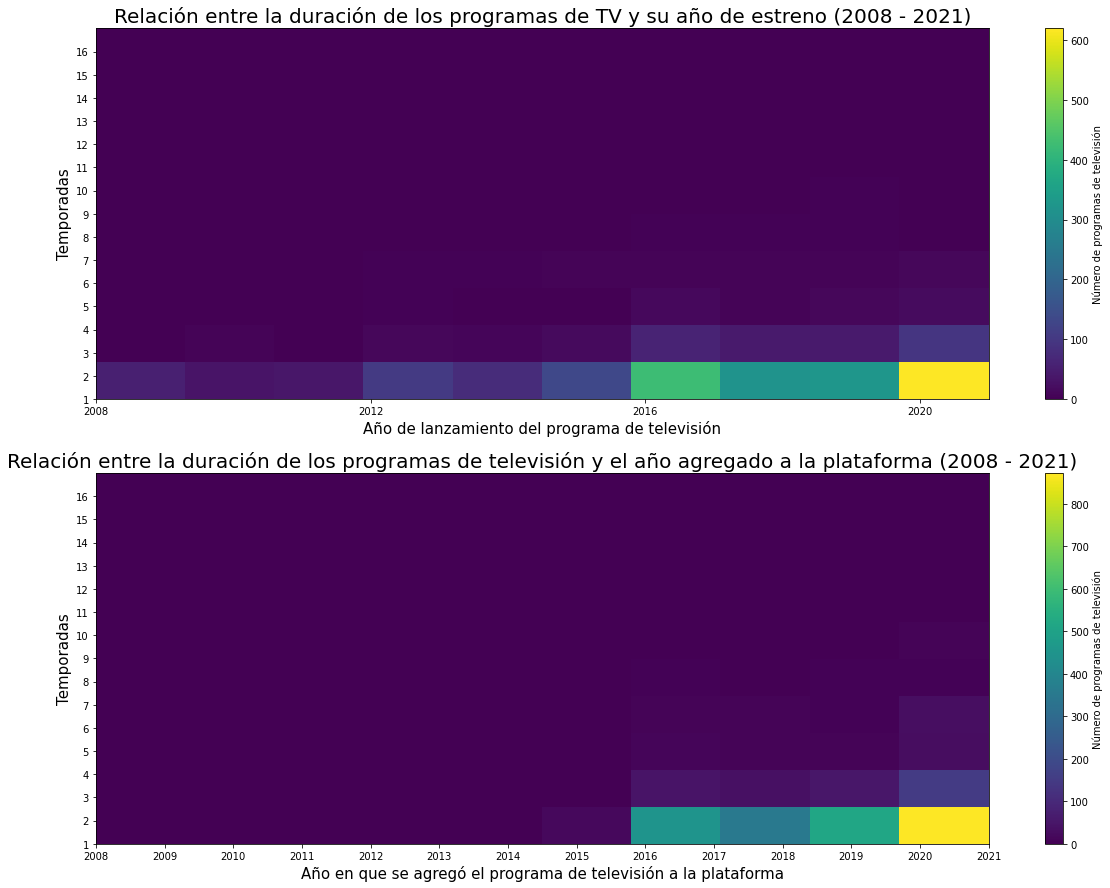

In [28]:
#Vemos la relación entre Netflix añadiendo programa de TV a su catálogo y su respectiva fecha de estreno
plt.figure(figsize=[20,15])
plt.subplot(2,1,1)
da_f = df_tv.release_year>2007
df_tv_f = df_tv[da_f]
tv_rd = plt.hist2d(data=df_tv_f,x='release_year',y='duration_seasons')
plt.xticks(np.arange(2008,2022,4));
plt.yticks(np.arange(1,17,1));
plt.xlabel('Año de lanzamiento del programa de televisión',fontsize = 15)
plt.ylabel('Temporadas',fontsize = 15)
plt.title("Relación entre la duración de los programas de TV y su año de estreno (2008 - 2021)",fontsize = 20)
plt.colorbar(label = 'Número de programas de televisión')

plt.subplot(2,1,2)
da_f = df_tv.date_added.dt.year>2007
df_tv_f = df_tv[da_f]
tv_rd1 = plt.hist2d(data=df_tv_f,x=df_tv_f.date_added.dt.year,y='duration_seasons')
plt.xticks(np.arange(2008,2022,1));
plt.yticks(np.arange(1,17,1));
plt.xlabel('Año en que se agregó el programa de televisión a la plataforma',fontsize = 15)
plt.ylabel('Temporadas',fontsize = 15)
plt.title("Relación entre la duración de los programas de televisión y el año agregado a la plataforma (2008 - 2021)",fontsize = 20)
plt.colorbar(label = 'Número de programas de televisión')

Tanto para el año de lanzamiento como para el año agregado a la plataforma, parece ser que la mayoría de los programas de televisión duran una sola temporada.

Text(0, 0.5, 'Número de películas')

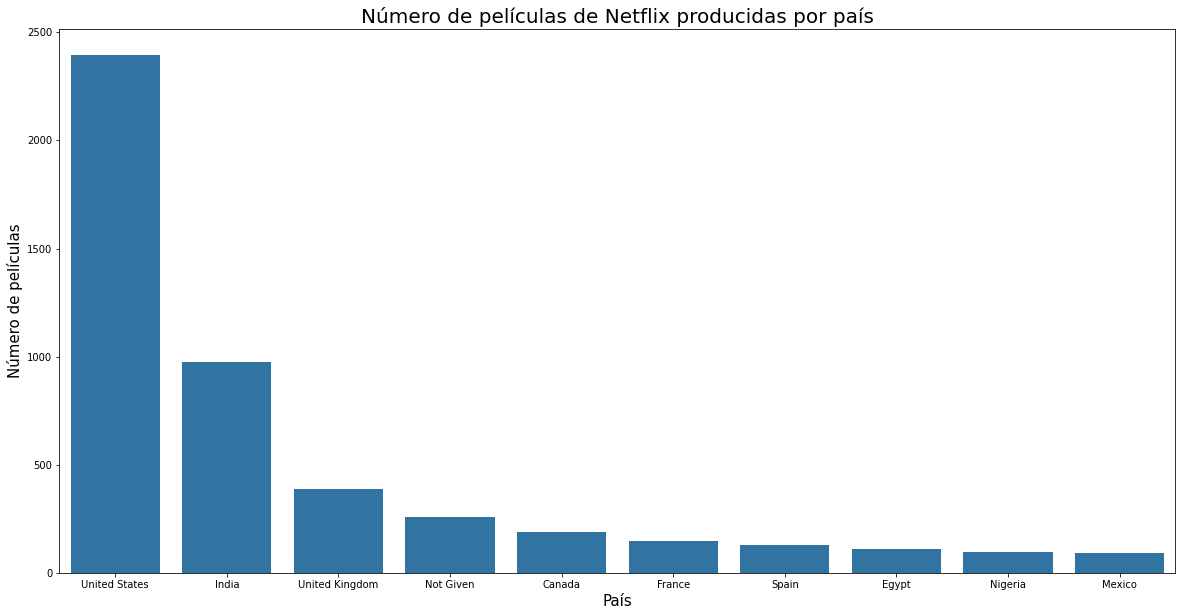

In [29]:
# Teniendo en cuenta que hay demasiados países, limitaremos nuestro estudio a solo los 10 países principales.
sort_order = df_movie.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_c = df_movie[df_movie['country'].isin(sort_order)]
base_color = base_color = sns.color_palette()[0]
plt.figure(figsize=[20,10])
movie_c = sns.countplot(x='country',data=df_movie_c,order=sort_order, color = base_color)
movie_c.set_title("Número de películas de Netflix producidas por país",fontsize = 20)
movie_c.set_xlabel('País',fontsize = 15)
movie_c.set_ylabel('Número de películas',fontsize = 15)

De manera similar a los programas de televisión de Netflix, la mayoría de las películas también se produjeron en los Estados Unidos. Sin embargo, el segundo país más popular sería India, probablemente debido a su gran industria cinematográfica ("Bollywood").

Sorprendentemente, a pesar de que Pakistán produce la mayoría de los programas de televisión para Netflix; no está considerado entre los 10 primeros países que más películas ha producido para Netflix.

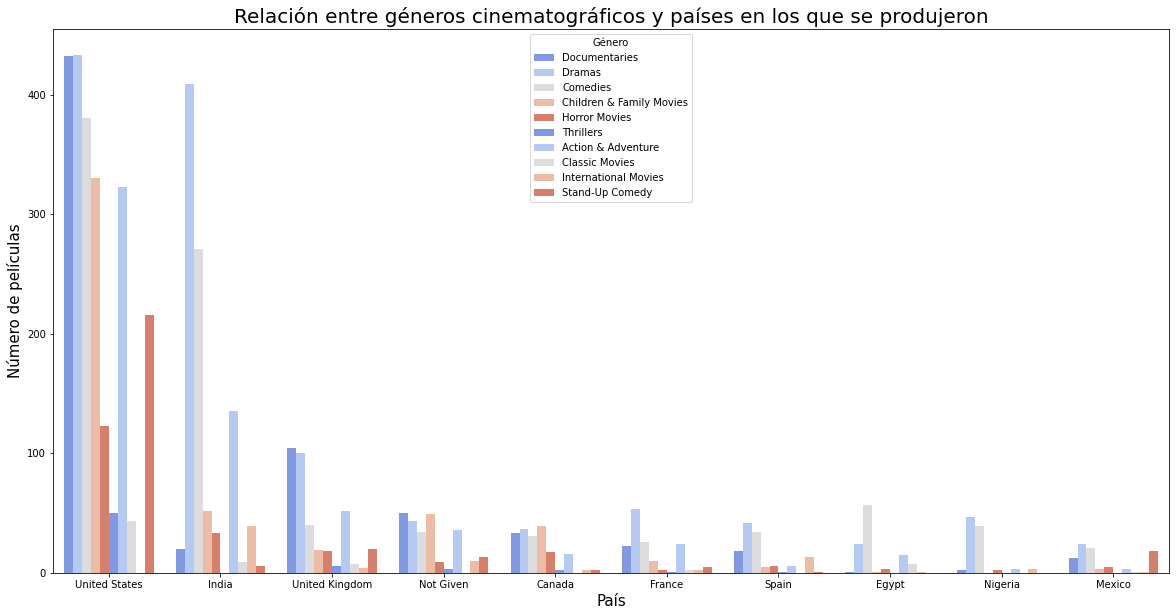

In [30]:
plt.figure(figsize=[20,10])
order1 = df_movie.groupby('listed_in1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_f = df_movie[df_movie['listed_in1'].isin(order1)]
order2 = df_movie_f.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_f = df_movie_f[df_movie_f['country'].isin(order2)]
base_color = sns.color_palette('coolwarm',n_colors=5)
a=df_movie.date_added.dt.year
tv_g = sns.countplot(data=df_movie_f,x='country',hue='listed_in1', palette=base_color, order=order2)
tv_g.set_xlabel('País',fontsize = 15)
tv_g.set_ylabel('Número de películas',fontsize = 15)
tv_g.set_title("Relación entre géneros cinematográficos y países en los que se produjeron",fontsize = 20)
plt.legend(title = 'Género',)

La mayoría de los medios producidos en los Estados Unidos fueron documentales, dramas y comedias. Mientras que para India, fueron principalmente dramas seguidos de comedias.

EE. UU. y el Reino Unido tienen una de las mayores proporciones en películas producidas frente a documentales.

Además, parece que la comedia de pie también es un gran género en los EE. UU.; en comparación con otros países.

<ipython-input-31-870754a070e4>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_movie_f = df_movie[ry_f][da_f]


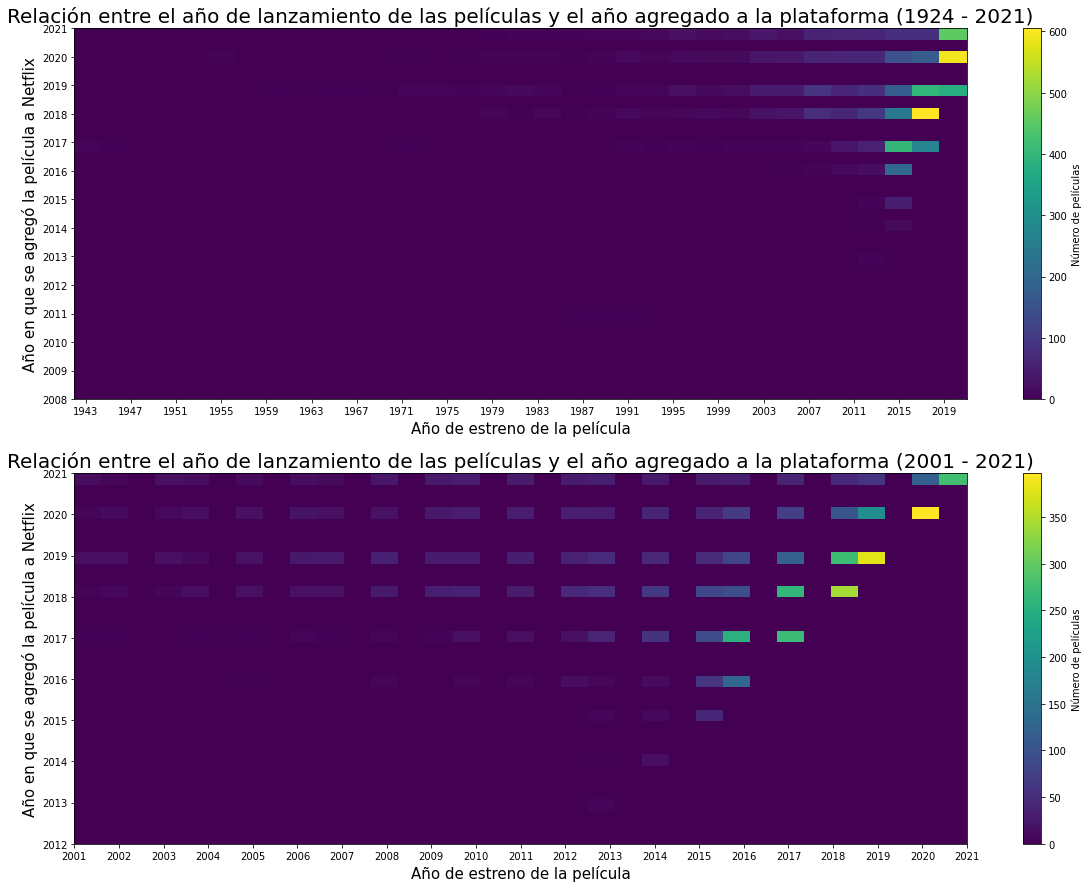

In [31]:
#Veremos la relación entre Netflix añadiendo Película a su catálogo y su respectiva fecha de estreno
plt.figure(figsize=[20,15])
bins=np.arange(1943,2025,4)
plt.subplot(2,1,1)
movie_rd = plt.hist2d(data=df_movie,x='release_year',y=df_movie.date_added.dt.year, bins=33)
plt.xticks(np.arange(1943,2022,4));
plt.yticks(np.arange(2008,2022,1));
plt.xlabel('Año de estreno de la película',fontsize = 15)
plt.ylabel('Año en que se agregó la película a Netflix',fontsize = 15)
plt.title("Relación entre el año de lanzamiento de las películas y el año agregado a la plataforma (1924 - 2021)",fontsize = 20)
plt.colorbar(label = 'Número de películas')

plt.subplot(2,1,2)
ry_f = df_movie.release_year>2000
da_f = df_movie.date_added.dt.year>2011
df_movie_f = df_movie[ry_f][da_f]
movie_rd1 = plt.hist2d(data=df_movie_f,x='release_year',y=df_movie_f.date_added.dt.year, bins=33)
plt.xticks(np.arange(2001,2022,1));
plt.yticks(np.arange(2012,2022,1));
plt.xlabel('Año de estreno de la película',fontsize = 15)
plt.ylabel('Año en que se agregó la película a Netflix',fontsize = 15)
plt.title("Relación entre el año de lanzamiento de las películas y el año agregado a la plataforma (2001 - 2021)",fontsize = 20)
plt.colorbar(label = 'Número de películas')


A partir de 2015, parece haber un claro aumento en la cantidad de películas estrenadas en el mismo año en que se agregaron a la plataforma. También hay una ligera disminución en 2021, pero esto probablemente se debió a COVID, ya que no se hicieron muchas películas en 2020 y se estrenaron en 2021.

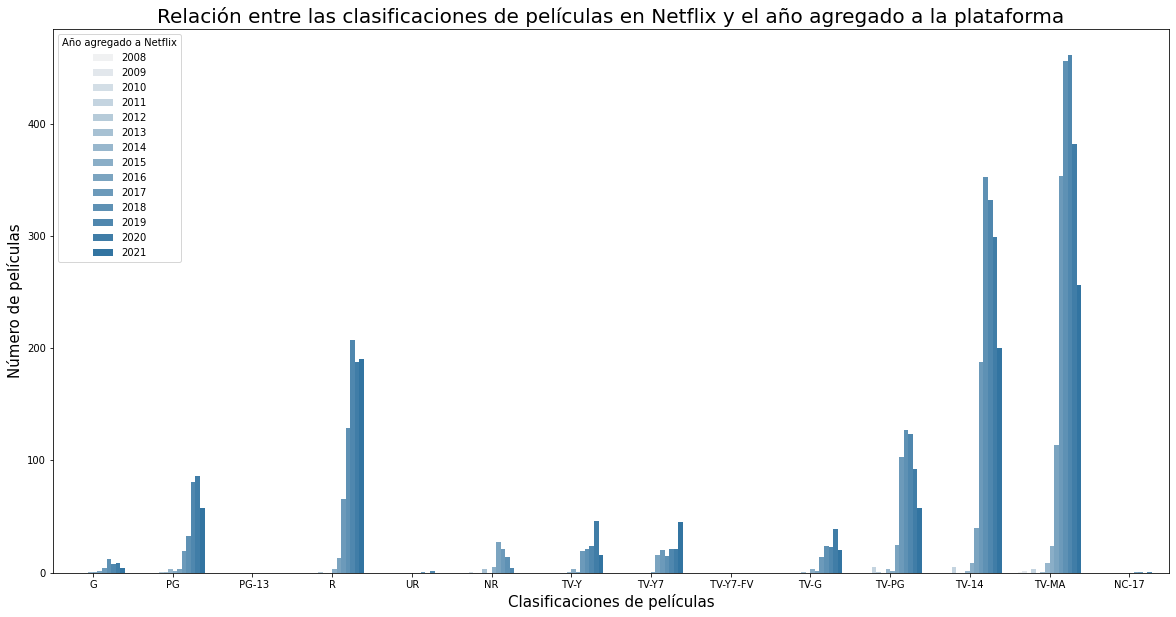

In [32]:
plt.figure(figsize=[20,10])
order = ['G', 'PG', ' PG-13', 'R', 'UR', 'NR', 'TV-Y', 'TV-Y7', ' TV-Y7-FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA', 'NC-17']
base_color = base_color = sns.color_palette()[0]
a=df_movie.date_added.dt.year
movie_g = sns.countplot(data=df_movie,x='rating',hue=a,order=order, color=base_color)
movie_g.set_xlabel('Clasificaciones de películas',fontsize = 15)
movie_g.set_ylabel('Número de películas',fontsize = 15)
movie_g.set_title("Relación entre las clasificaciones de películas en Netflix y el año agregado a la plataforma",fontsize = 20)
plt.legend(title = 'Año agregado a Netflix',)

Las películas tenían clasificación de películas y clasificación de televisión, lo que significa que algunas de las películas que forman parte de Netflix fueron películas hechas directamente para la televisión.

Parece que la mayoría de las películas disponibles en Netflix serían para personas de edad madura (18+, R y TV-MA).

Parece que Netflix no quería traer películas para adolescentes estrenadas en cines (PG-13) a su plataforma, sino películas con clasificación R. Esta estrategia es diferente a la de películas directas a TV, ya que la segunda clasificación más popular sería TV-14.

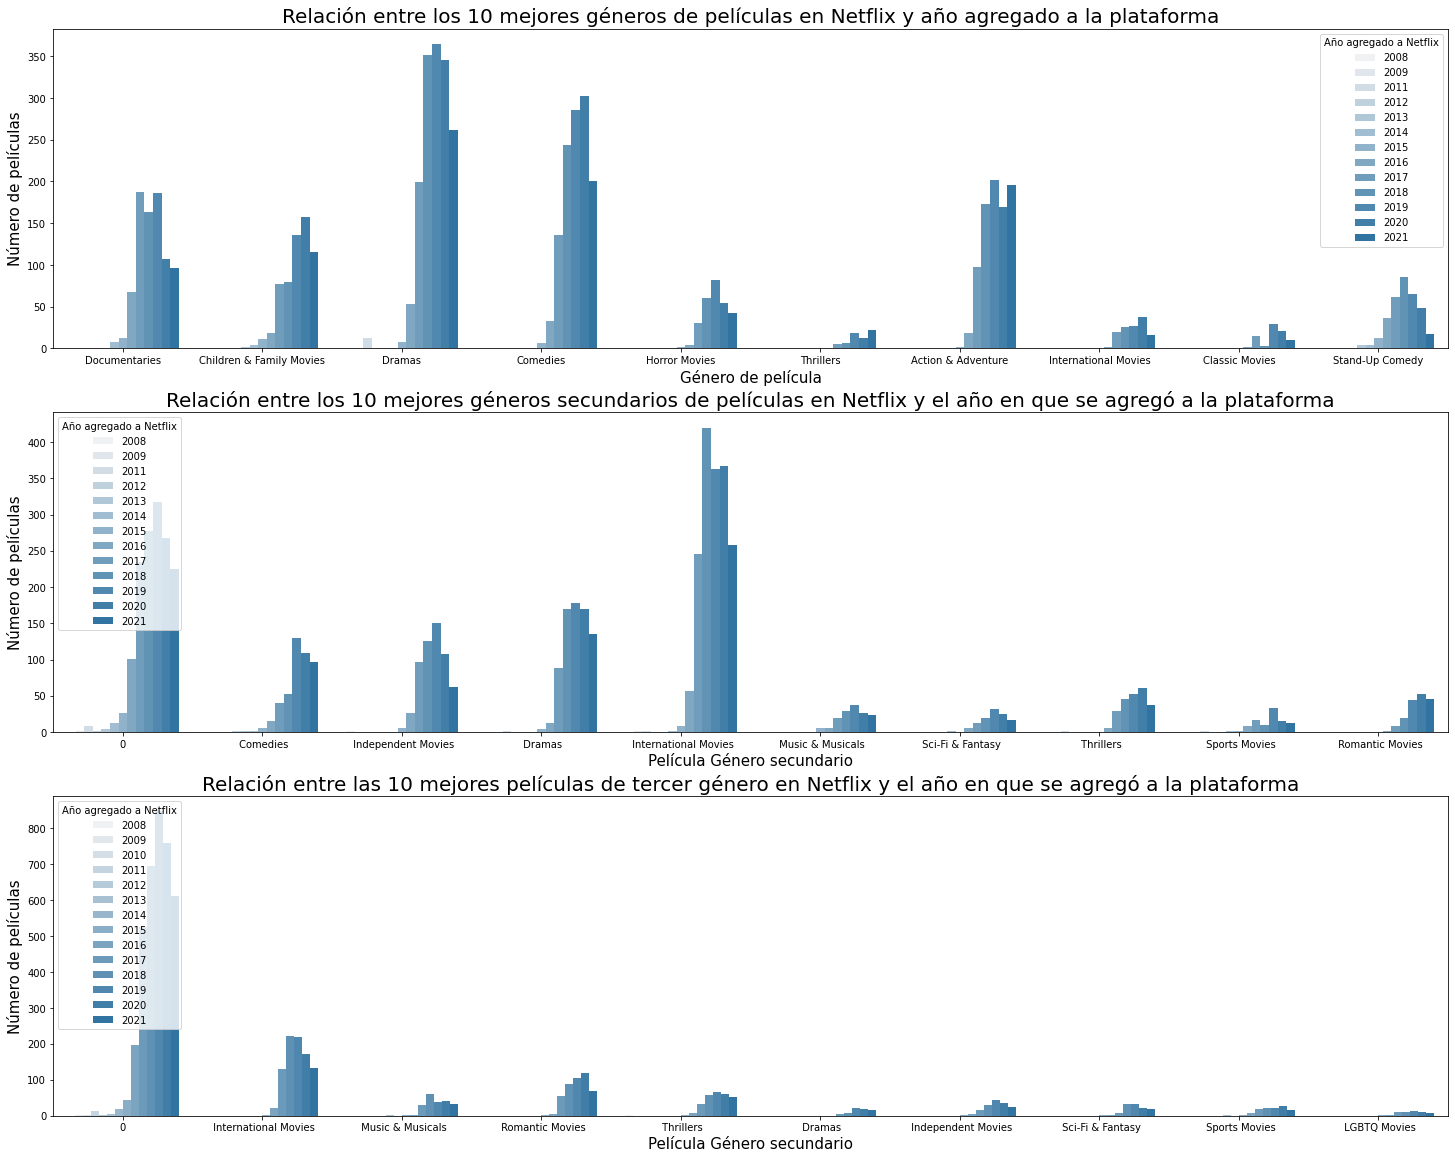

In [33]:
plt.figure(figsize=[25,20])
plt.subplot(3,1,1)

base_color = base_color = sns.color_palette()[0]
sort_order = df_movie.groupby('listed_in1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_g = df_movie[df_movie['listed_in1'].isin(sort_order)]
movie_g = sns.countplot(data=df_movie_g,x='listed_in1',hue=df_movie_g.date_added.dt.year, color=base_color)
movie_g.set_xlabel('Género de película',fontsize = 15)
movie_g.set_ylabel('Número de películas',fontsize = 15)
movie_g.set_title("Relación entre los 10 mejores géneros de películas en Netflix y año agregado a la plataforma",fontsize = 20)
plt.legend(title = 'Año agregado a Netflix')

plt.subplot(3,1,2)

base_color = base_color = sns.color_palette()[0]
sort_order = df_movie.groupby('listed_in2').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_g = df_movie[df_movie['listed_in2'].isin(sort_order)]
movie_g1 = sns.countplot(data=df_movie_g,x='listed_in2',hue=df_movie_g.date_added.dt.year, color=base_color)
movie_g1.set_xlabel('Película Género secundario',fontsize = 15)
movie_g1.set_ylabel('Número de películas',fontsize = 15)
movie_g1.set_title("Relación entre los 10 mejores géneros secundarios de películas en Netflix y el año en que se agregó a la plataforma",fontsize = 20)
plt.legend(title = 'Año agregado a Netflix')

plt.subplot(3,1,3)

base_color = base_color = sns.color_palette()[0]
sort_order = df_movie.groupby('listed_in3').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_g = df_movie[df_movie['listed_in3'].isin(sort_order)]
movie_g3 = sns.countplot(data=df_movie_g,x='listed_in3',hue=df_movie_g.date_added.dt.year, color=base_color)
movie_g3.set_xlabel('Película Género secundario',fontsize = 15)
movie_g3.set_ylabel('Número de películas',fontsize = 15)
movie_g3.set_title("Relación entre las 10 mejores películas de tercer género en Netflix y el año en que se agregó a la plataforma",fontsize = 20)
plt.legend(title = 'Año agregado a Netflix')

Para este análisis se tuvo que hacer una suposición, la primera categoría/género que aparece en una Película se clasificaría como la categoría 'principal', seguida por la secundaria y la tercera.

La mayoría de las películas producidas fueron dramas, comedias y acción y aventuras.

Para los géneros secundarios, la mayoría de los programas de televisión se clasifican como películas internacionales. Pero el resto se clasificaron principalmente como Ninguno, dramas y películas independientes.

Para el tercer género, la mayoría de los programas de televisión no tienen un tercer género. Pero el resto se clasificaron principalmente como películas internacionales.

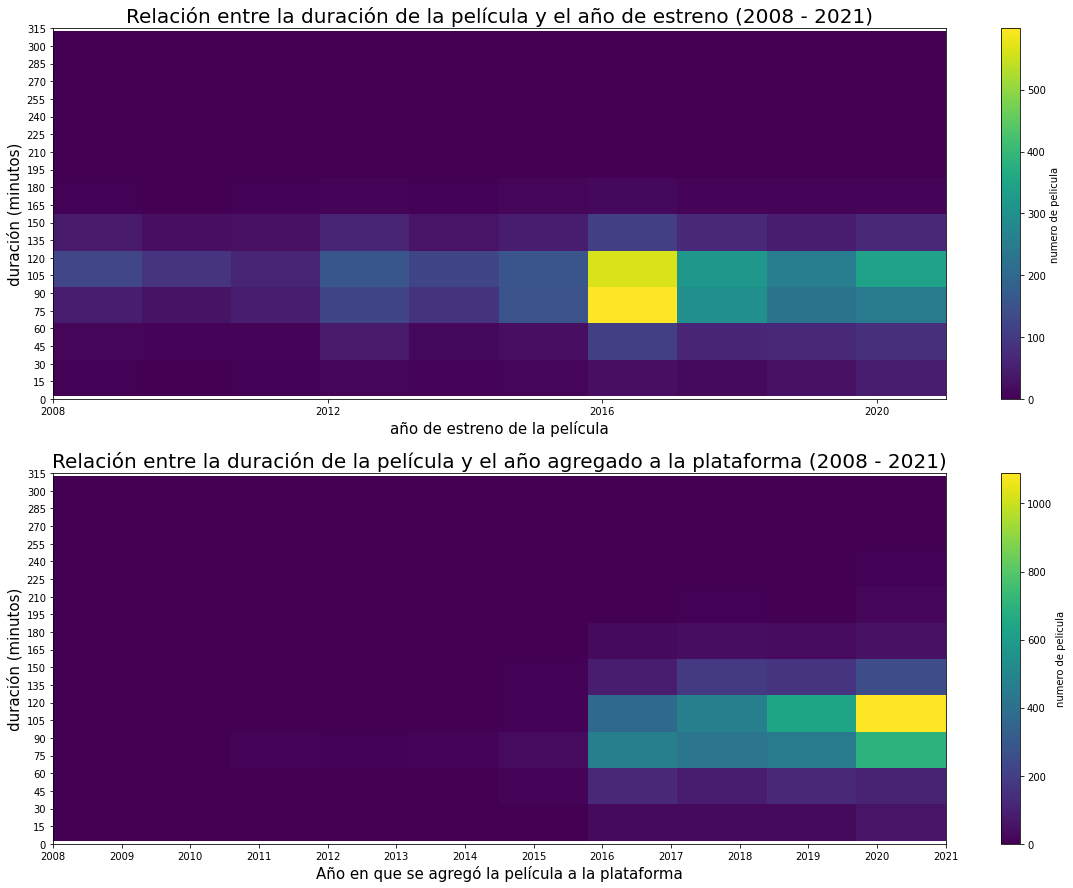

In [34]:
#Veremos la relación entre Netflix añadiendo películas a su catálogo y su respectiva fecha de estreno
plt.figure(figsize=[20,15])
plt.subplot(2,1,1)
da_f = df_movie.release_year>2007
df_movie_f = df_movie[da_f]
movie_rd = plt.hist2d(data=df_movie_f,x='release_year',y='duration_minutes')
plt.xticks(np.arange(2008,2022,4));
plt.yticks(np.arange(0,316,15));
plt.xlabel('año de estreno de la película',fontsize = 15)
plt.ylabel('duración (minutos)',fontsize = 15)
plt.title("Relación entre la duración de la película y el año de estreno (2008 - 2021)",fontsize = 20)
plt.colorbar(label = 'numero de pelicula')

plt.subplot(2,1,2)
da_f = df_movie.date_added.dt.year>2007
df_movie_f = df_movie[da_f]
movie_rd1 = plt.hist2d(data=df_movie_f,x=df_movie_f.date_added.dt.year,y='duration_minutes')
plt.xticks(np.arange(2008,2022,1));
plt.yticks(np.arange(0,316,15));
plt.xlabel('Año en que se agregó la película a la plataforma',fontsize = 15)
plt.ylabel('duración (minutos)',fontsize = 15)
plt.title("Relación entre la duración de la película y el año agregado a la plataforma (2008 - 2021)",fontsize = 20)
plt.colorbar(label = 'numero de pelicula')

Para el año de lanzamiento y la duración de las películas, la mayor parte de la duración de la película oscila entre 70 y 120 minutos, sin embargo, la duración de las películas ha disminuido con el tiempo.

Para la duración de las películas y el año en que se agregaron a la plataforma, sigue una tendencia similar en la que la mayoría de las películas duran entre 70 y 120 minutos. Sin embargo, también parece que la mayoría de las películas parecen estar aumentando gradualmente en duración.